In [36]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [77]:
class Const:
    def __init__(self):
        self.n_trials = 1
        self.n_animals = 200
        self.n_steps = 100
        self.speed = 0.05
        self.v_decay = 0.7
        self.arena_size = 3
        self.contagion_distance = 0.1 **2

In [78]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals) *c.speed
        vy = np.zeros(c.n_animals) *c.speed
        infected = np.zeros(c.n_animals)
        infected[0] = 1
        
        stats = np.zeros(c.n_steps)

        if show_dotses:
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) 
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            vx = np.random.randn(c.n_animals)*c.speed
            vy = np.random.randn(c.n_animals)*c.speed
            
            x = np.maximum(0,np.minimum(x,c.arena_size)) 
            y = np.maximum(0,np.minimum(y,c.arena_size))
            
            for i_animal in range(c.n_animals): 
                if infected[i_animal] ==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victim = np.argwhere(d < c.contagion_distance)
                    infected[victim] =1
                
            stats[t] = np.sum(infected)/c.n_animals
            
            if show_dotses: 
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'k.',markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'r.',markersize=5); 
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() 

        history[:,i_trial] = stats
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


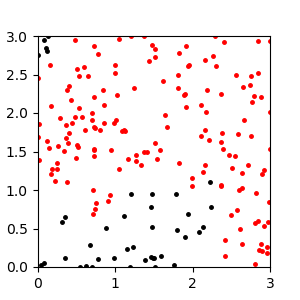

<IPython.core.display.Javascript object>


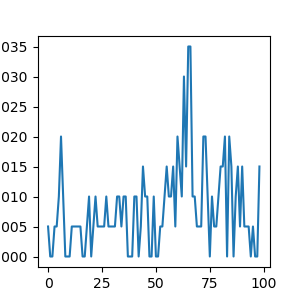

In [82]:
c = Const()
#np.random.seed(1) to give you the same result each time your run w the same numbers
curve = model(c, show_dotses=True);
plt.figure(figsize = (3,3));
plt.plot(np.diff(curve));

My main guess is that the babies all start at one health and the uniformity of the babies' health means that there is  a sudden boost of those grandbabies (so to speak) if they are in an area with lots of food. If this is the error, I don't know how to properly fix it (would a randomized health be it?)

My second quess/question is that the reproduction cost is less than half the life of the parent? That means that every single parent is having twins the first time they reproduce right? 